In [73]:
# k = 1
# cmath.exp(x+jy) = exp(x)(cos y + sin y j)
# exp(0) = cos 0 + j sin 0
# polar form = 1 /deg
# real component = 1*cos(deg)
# img component = 1*sin(deg)
# rectangular form = real + img j 


def exp_deg(mag,deg):
    
    rad = deg*(np.pi/180)
    real = mag*np.cos(rad)
    img = mag*np.sin(rad)

    if abs(real) < 0.00000001 :
           real = 0 

    if abs(img) < 0.00000001 :
          img = 0 

    rect = real + img*1j

    return rect

def exp_rad(mag,rad):
    real = mag*np.cos(rad)
    #print(real)
    img = mag*np.sin(rad)
    #print("img :" +str(img))
    if abs(real) < 0.00000001 :
        real = 0
      
    if abs(img) < 0.00000001 :
        img = 0
    rect = real + img*1j
    #print("final :" + str(rect))
    return rect


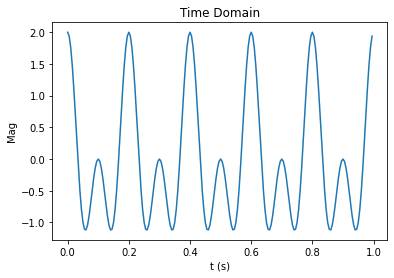

In [74]:
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import numpy as np
import cmath, math

fc = 10
fc2 = 5
fs = 20*fc
t = np.arange(start=0, stop=1, step=1/fs)
x1 = np.cos(2*np.pi*fc*t)
x2 = np.cos(2*np.pi*fc2*t)
x = x1+x2

plt.plot(t,x)

plt.title("Time Domain")
plt.ylabel("Mag")
plt.xlabel("t (s)")
plt.show()

Size of Sample is 200
Size of FFT is 200


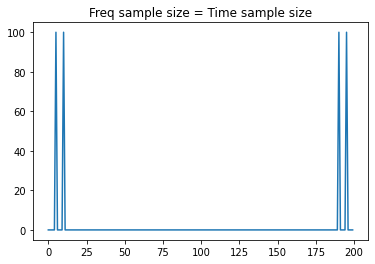

In [75]:
# FFT 

X = abs(fft(x))
t_f = np.arange(start= 0,stop=len(fft(x)))
print("Size of Sample is " + str(len(x)))
print("Size of FFT is " + str(len(X)))

plt.plot(t_f,X)
plt.title("Freq sample size = Time sample size")
plt.show()



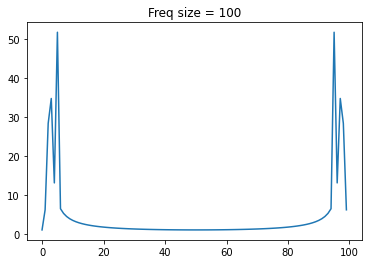

In [76]:
N = 100
X = abs(fft(x,N))
f_x = np.arange(start =0, stop = N)

plt.plot(f_x,X)
plt.title("Freq size = 100")
plt.show()

# It shows that FFT must have same or greater
# Time sample size 

[ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.22464680e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01]
20


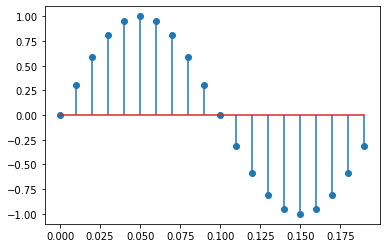

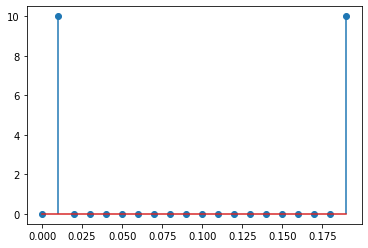

In [77]:
# Calculation of FFT  X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2pikn/N)

f = 5
fs = 20*f
t = np.arange(start = 0, stop = 1, step=1/fs)
x = np.sin(2*np.pi*t*f)
X = fft(x[0:20])

print(x[0:20])
print(len(x[0:20]))

plt.stem(t[0:20],x[0:20])
plt.show()

plt.stem(t[0:20],abs(X))
plt.show()

In [105]:
def sum_exp (N_1, x, k):
    total = 0
    n = 0
    for i in x:
        total = total + i*exp_rad(1,(2*np.pi*k*n/(N_1+1))) 
        n = n+1
    #print("k is " + str(k) +" and total is " +str(abs(total))) 
    return total

def exp_list (N_1, x, k):
    total = 0 
    n = 0
    array_exp = []
    for i in range(0,N_1):
        array_exp.append(exp_rad(1,(2*np.pi*k*n/N_1+1)))
        n = n+1
    
    return array_exp

def fft_list(N_1, x, k):
    total = 0
    n= 0
    array_exp = []
    for i  in x:
        array_exp.append(i*exp_rad(1,(2*np.pi*k*n/N_1+1))) # k is simply change the frequency of the unit circle 
        n = n+1
    return array_exp

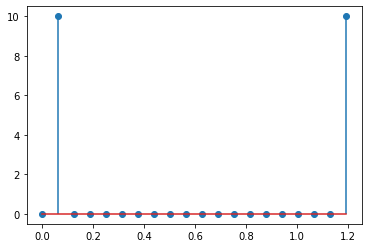

In [106]:
# Calculation of FFT  X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2*pi*k*n/N)
# N = 20 
X = fft(x[0:20],20)
cal = []
for i in range(0,20):
    cal.append(abs(sum_exp (19,x[0:20],i)))    

plt.stem(t[0:20],cal)
plt.show()

20
20
(8.414709848078928-5.403023058681444j) Abs is 9.999999999999995


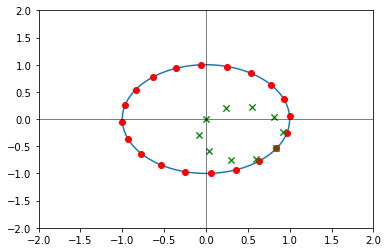

In [116]:
# Visualization of DFT algorithm 
# X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2*pi*k*n/N)
# Plot the e^(-j2*pi*k*n/N) on complex plane

complex_t = exp_rad(1,(2*np.pi*1*0.5)) 
complex_array = exp_list(20,x[0:20],1)
complex_array_2 = fft_list(20,x[0:20],19)
print(len(complex_array))
print(len(complex_array_2))
#print(complex_array)
print(str(np.sum(complex_array_2)) + " Abs is " + str(abs(np.sum(complex_array_2)))) 


#plot the unit circle on the complex plane
t = np.linspace(0,2*np.pi,101)
plt.plot(np.cos(t),np.sin(t))

#plot the output of exp_rad onto the complex plane
plt.plot(np.real(complex_array),np.imag(complex_array),"ro")
plt.plot(np.real(complex_array_2),np.imag(complex_array_2),"gx")

#graph settings
#plt.axes().set_aspect("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([0,0],[-2,2],'k',linewidth=0.5)
plt.plot([-2,2],[0,0],'k',linewidth=0.5)
plt.show()
